# Demo 3 - Convolutional Neural Networks usando Keras e Ckeras-introIFAR-10

### 1. Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

*** Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

In [0]:
import keras
from keras.datasets import cifar10

#carregando o dataset pré-embaralhado de treinamento bem como os dados de teste
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualizando as primeiras 24 imagens do dataset de treinamento

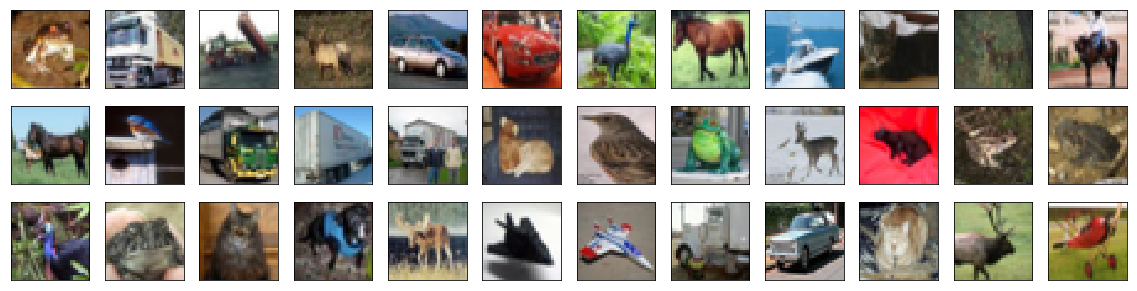

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [0]:
# redimensionamento [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

In [11]:
from keras.utils import np_utils

# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino
print('x_train shape:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)         0         
__________

### 6. Compilando o modelo

In [0]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Treinando o modelo

In [14]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

# tentem mudar o número de épocas de treinamento e verificar o comportamento de nosso algoritmo

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 7s - loss: 1.7390 - acc: 0.3662 - val_loss: 1.5764 - val_acc: 0.4362

Epoch 00001: val_loss improved from inf to 1.57635, saving model to model.weights.best.hdf5
Epoch 2/10
 - 6s - loss: 1.3832 - acc: 0.5018 - val_loss: 1.4698 - val_acc: 0.4956

Epoch 00002: val_loss improved from 1.57635 to 1.46985, saving model to model.weights.best.hdf5
Epoch 3/10
 - 6s - loss: 1.2229 - acc: 0.5653 - val_loss: 1.1515 - val_acc: 0.5898

Epoch 00003: val_loss improved from 1.46985 to 1.15146, saving model to model.weights.best.hdf5
Epoch 4/10
 - 6s - loss: 1.1235 - acc: 0.6032 - val_loss: 1.3049 - val_acc: 0.5184

Epoch 00004: val_loss did not improve from 1.15146
Epoch 5/10
 - 6s - loss: 1.0513 - acc: 0.6310 - val_loss: 1.0258 - val_acc: 0.6366

Epoch 00005: val_loss improved from 1.15146 to 1.02576, saving model to model.weights.best.hdf5
Epoch 6/10
 - 6s - loss: 1.0010 - acc: 0.6498 - val_loss: 1.0298 - val_acc: 0.6408

Epoch 00006: val

### 8. Carregando o modelo com a melhor precisão de validação

In [0]:
# carregando os pesos que geraram a melhor precisão de validação
model.load_weights('model.weights.best.hdf5')

### 9. Cálculo da precisão de classificação no dataset de testes

In [16]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.6946)


### 10. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [0]:
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

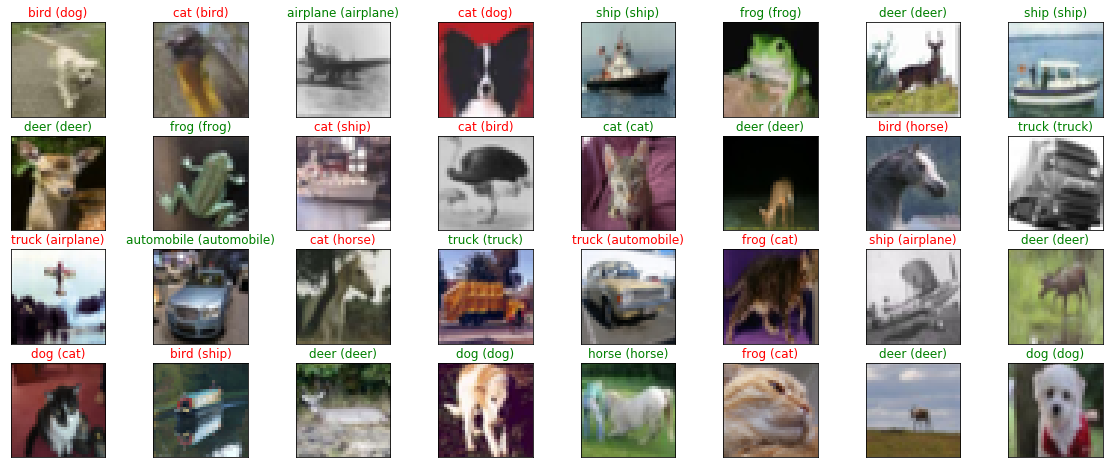

In [18]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
